<a href="https://colab.research.google.com/github/JHyunjun/Seoul_National_University/blob/main/Optimization_QuadraticProgramming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization-Lab

In [15]:
# Import packages
import numpy as np
from cvxopt import matrix
from cvxopt import solvers
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

'''
[본식]
#Find x,y for minimize(x.^2 + 4*(y-4).^2)
[문제조건]
x+y<=7
-x2+y<=4
y<=4
x>=0
y>=0 인 경우에 대해서 찾아라
'''

'\n[본식]\n#Find x,y for minimize(x.^2 + 4*(y-4).^2)\n[문제조건]\nx+y<=7\n-x2+y<=4\ny<=4\nx>=0\ny>=0 인 경우에 대해서 찾아라\n'

# 1. Quadratic Programming in Python
## - Standard Form of a QP
$$minimize \;  \frac{1}{2} x^THx - c^Tx, \; subject\; to\; A^Tx\ge b$$
## - Example problem
### minimize
$$\frac{1}{2} \begin{bmatrix} x\\y \end{bmatrix}^T 
\begin{bmatrix} 2 & 0 \\ 0 & 8 \end{bmatrix} \begin{bmatrix} x\\y \end{bmatrix}
- \begin{bmatrix} 0\\32 \end{bmatrix}^T
\begin{bmatrix} x\\y \end{bmatrix}$$
### subject to
$$
\begin{bmatrix} -1 & -1\\ 1&-2 \\ 0 & -1 \\ 1 & 0 \\ 0 & 1 \end{bmatrix}
\begin{bmatrix} x\\y \end{bmatrix} \ge
\begin{bmatrix}-7\\-4 \\ -4 \\0 \\0 \end{bmatrix}
$$


In [20]:
# Define QP parameters

#H와 c로 x.^2 + 4y^2 -32y 표현, tc = 'd'는 data type을 double로 해준다는말
H = matrix(np.array([[2,0],[0,8]]), tc='d') # ★[1,4]인데 절반해주므로 [2,8] (0.5*x.T*H*x) 공식 자체에 맞춰줘야함
c = matrix(np.array([0,32]), tc='d')
At = matrix(np.array([[-1,-1],[1,-2],[0,-1],[1,0],[0,1]]), tc = 'd') # 문제조건
# -x-y>=-7, -2y>=-4, ...
b = matrix(np.array([-7,-4,-4,0,0]).T, tc='d') # 문제조건

print(H)
print(c)
print(At)
print(b)

# Construct the QP, invoke solver
# 라이브러리에는 Ax <= b 형식으로 Default로 코딩되어있어서, Ax>=b로 적어낸 식을 부등호를 반대로바꾸어주고자 -At,-b로 기입
sol = solvers.qp(H, -c, -At, -b)

# Extract optimal value and solution
print(sol['x'])
print(sol['primal objective'])

#최종적으로 x=2, y=3을 본 식에 집어넣은 -56이 정답

[ 2.00e+00  0.00e+00]
[ 0.00e+00  8.00e+00]

[ 0.00e+00]
[ 3.20e+01]

[-1.00e+00 -1.00e+00]
[ 1.00e+00 -2.00e+00]
[ 0.00e+00 -1.00e+00]
[ 1.00e+00  0.00e+00]
[ 0.00e+00  1.00e+00]

[-7.00e+00]
[-4.00e+00]
[-4.00e+00]
[ 0.00e+00]
[ 0.00e+00]

     pcost       dcost       gap    pres   dres
 0: -6.1262e+01 -6.5632e+01  5e+01  7e-01  4e-01
 1: -5.5119e+01 -6.1870e+01  7e+00  1e-16  2e-16
 2: -5.5976e+01 -5.6216e+01  2e-01  1e-16  1e-16
 3: -5.6000e+01 -5.6002e+01  2e-03  7e-17  2e-16
 4: -5.6000e+01 -5.6000e+01  2e-05  1e-16  5e-16
Optimal solution found.
[ 2.00e+00]
[ 3.00e+00]

-55.999997728036654


In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 2. Portfolio Optimization

### minimize 
$$ \sum_{i,j} p_{ij} = \sum_{i,j} c_{ij}\cdot s_i s_j \cdot x_i x_j$$
### subject to
$$ \sum_i x_i = 1$$ $$ \sum_i m_i x_i \ge 0.002 $$ $$ x_i \ge 0 \; for \; all \; i$$ 

In [23]:
# Read Data
# 각 asset별 mean, std (31개)
mean, std = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/SNU_AI-Master/week1/220706/assets2.tsv', delimiter = '\t', skiprows = 1, unpack = True, dtype = np.double())
# C i,j는 i번째와 j번째 자산을 투자할때의 Risk coefficient(높을수록 위험도가 큼)
# P i,j = Cij * Si*Sj * xi, 이익의 분산(s)이 크고, Risk Coefficient가 클수록 위험한 자산이라고 판단
# C.shape은 (31,31)로 각각의 asset을 동시에 구매할때의 Risk Coefficient
C = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/SNU_AI-Master/week1/220706/assets-corr2.tsv', delimiter = '\t', usecols = range(0,31), dtype = np.double())

In [45]:
# Define QP parameters
# 1. Define arrays using numpy
N = len(mean) #31
H = C * std.reshape(1,-1).T * std.reshape(1,-1) # C_i,j * si * sj 이며, x_i(asset별 Risk)를 찾는게 문제, *:element 곱셈 : H11=c11*s1*s1
# std.reshape(1,-1).T : Column Vector형태로 만든다 -> column vector * row vector = Matrix
print('H : ',H.shape)
c = np.zeros(N)
At = np.vstack((mean, np.identity(N)))
print('At : ', At.shape)
b = np.concatenate((np.array([0.002]), np.zeros(N))) #최소 기대수익률 0.2%이상 만족하는 경우를 찾으며 && min(Risk)
P = np.ones((1,N)) #[1,31]
q = np.array(([1])) #[1,]

# 2. Transform numpy arrays to the CVXOPT's matrix type
H = matrix(H, tc='d')
c = matrix(c, tc='d')
At = matrix(At, tc='d')
b = matrix(b, tc='d')
#P*x = q이므로 이게 Sigma(x) = 1을 의미함
P = matrix(P,tc='d')
q = matrix(q, tc='d')
''' At와 b의 첫번째 행에 수식이 있음. mi*xi >= 0.002(최소수익 0.2%), Sigma(xi)=1
print(At)
print(b)
'''

H :  (31, 31)
At :  (32, 31)


' At와 b의 첫번째 행에 수식이 있음. mi*xi >= 0.002(최소수익 0.2%), Sigma(xi)=1\nprint(At)\nprint(b)\n'

In [46]:
# Construct the QP, invoke solver
sol = solvers.qp(H, -c, -At, -b, P, q)

     pcost       dcost       gap    pres   dres
 0:  5.6362e-04 -1.0016e+00  1e+00  2e-16  6e+00
 1:  5.6350e-04 -1.0084e-02  1e-02  3e-17  6e-02
 2:  5.5302e-04 -1.5793e-04  7e-04  4e-17  4e-03
 3:  3.7518e-04 -1.1807e-04  5e-04  2e-16  1e-18
 4:  3.5185e-04  2.6269e-04  9e-05  2e-16  9e-19
 5:  3.2954e-04  3.0686e-04  2e-05  1e-16  5e-19
 6:  3.2217e-04  3.2045e-04  2e-06  1e-16  7e-19
 7:  3.2118e-04  3.2111e-04  6e-08  2e-16  8e-19
Optimal solution found.


In [47]:
# Extract optimal value and solution
xs = np.array(sol['x'].T).squeeze()
print(xs)
print(sol['primal objective'])
print(xs.shape) #(31,)

[5.04030371e-04 1.14328418e-02 5.55229472e-05 1.07503393e-05
 6.80042323e-04 3.18699985e-06 2.96398792e-06 7.74533612e-06
 1.76346865e-03 3.38249405e-06 6.44407059e-06 2.89092017e-05
 4.72485091e-02 5.40470931e-06 7.55166200e-02 1.06204238e-01
 4.60936212e-02 6.09601230e-06 6.53897405e-06 3.86047698e-06
 4.97036796e-06 1.00386503e-04 9.39322553e-06 2.65778839e-06
 2.38087690e-06 1.45084655e-01 3.64250709e-06 3.06375999e-01
 6.17318871e-02 1.35570966e-01 6.15288846e-02]
0.0003211770254786336
(31,)


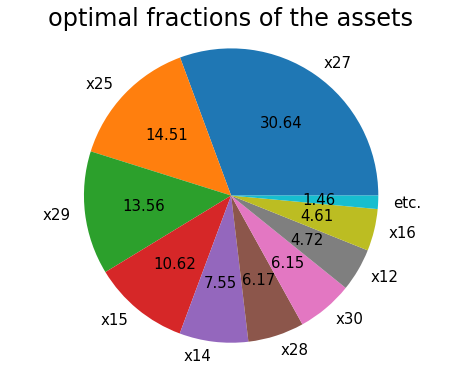

In [48]:
# Visualization
num = 9
sorted_indices = np.argsort(xs*(-1))
labels = [ f'x{idx}' for idx in sorted_indices[:num]]
labels += [ 'etc.']

sorted_xs = np.sort(xs)[::-1]
sorted_xs = np.append(sorted_xs[:num], [sorted_xs[num:].sum()])

# Plotting
plt.rcParams['figure.figsize'] = [8, 6]
plt.pie(np.array(sorted_xs).T.squeeze(), autopct = '%1.2f', labels = labels, textprops = {'fontsize':15})
plt.axis('equal')
plt.title('optimal fractions of the assets', fontsize = 24)
plt.show()

# 3. Exercise Problem
### minimize
$$ \frac{1}{2} x^2 + 3x + 4y $$
### subject to
$$ x,y \ge 0,\; x+3y\ge 15,\; 2x+5y \le 100,\; 3x+4y \le80 $$ 

In [54]:
#H와 c로 0.5x^2+3x+4y 표현, tc = 'd'는 data type을 double로 해준다는말
H = matrix(np.array([[1,0],[0,0]]), tc='d')
c = matrix(np.array([-3,-4]), tc='d')
At = matrix(np.array([[1,1],[1,3],[-2,-5],[-3,-4]]), tc = 'd') # 문제조건
# -x-y>=-7, -2y>=-4, ...
b = matrix(np.array([0,15,-100,-80]).T, tc='d') # 문제조건
sol = solvers.qp(H, -c, -At, -b)

# Extract optimal value and solution
print(sol['x'])
print(sol['primal objective'])


     pcost       dcost       gap    pres   dres
 0:  8.3415e+01 -7.3339e+02  8e+02  0e+00  4e+01
 1:  7.2959e+01  1.2755e+00  7e+01  3e-16  3e+00
 2:  6.0655e+01  4.6219e+01  1e+01  6e-17  9e-01
 3:  1.9890e+01  2.5701e+00  2e+01  6e-17  8e-01
 4:  3.8154e+01  1.6150e+01  2e+01  1e-16  6e-01
 5:  1.8806e+01  9.2247e+00  1e+01  2e-16  1e-01
 6:  1.8613e+01  1.8514e+01  1e-01  8e-17  2e-03
 7:  1.8611e+01  1.8610e+01  1e-03  1e-16  2e-05
 8:  1.8611e+01  1.8611e+01  1e-05  4e-17  2e-07
 9:  1.8611e+01  1.8611e+01  1e-07  2e-16  2e-09
Optimal solution found.
[-1.67e+00]
[ 5.56e+00]

18.61111111305836


### maximize
$$ \frac{1}{2} x^2 + 3x + 4y $$
### subject to
$$ x,y \ge 0,\; x+3y\ge 15,\; 2x+5y \le 100,\; 3x+4y \le80 $$ 

In [64]:
#H와 c로 0.5x^2+3x+4y 표현, tc = 'd'는 data type을 double로 해준다는말
H = matrix(np.array([[1,0],[0,0]]), tc='d')
c = matrix(np.array([-3,-4]), tc='d')
At = matrix(np.array([[1,1],[1,3],[-2,-5],[-3,-4]]), tc = 'd') # 문제조건
# -x-y>=-7, -2y>=-4, ...
b = matrix(np.array([0,15,-100,-180]).T, tc='d') # 문제조건
sol = solvers.qp(-H, c, -At, -b)

# Extract optimal value and solution
print(sol['x'])
print(sol['primal objective'])

     pcost       dcost       gap    pres   dres
 0: -1.1351e+04 -1.4128e+03  1e+04  6e-01  1e+02
 1: -4.3910e+03 -5.6590e+03  1e+03  3e-17  5e-12
 2: -4.7552e+03 -4.7978e+03  4e+01  3e-16  6e-13
 3: -4.7877e+03 -4.7881e+03  4e-01  0e+00  2e-13
 4: -4.7880e+03 -4.7880e+03  4e-03  2e-16  4e-13
Optimal solution found.
[ 9.60e+01]
[-2.70e+01]

-4787.996708705156
